In [1]:
import pandas as pd
import seaborn as sns; sns.set()

In [184]:
#Find the amount allocated to each cause area in 2020
cause_areas = pd.Series(['Global Health', 'Animal Welfare', 'Longtermism', 'Meta'], name='Cause Area')
EA_funds = [3861068.57, 1474852.10, 1761781.21, 1999726.27] #exact numbers from their website
givewell = [105000000, 0, 0, 0] #Total $ 'moved', less Open Phil, projected fwd from 2019
open_phil = [54324458, 22780748, 45903684, 17812170] #custom-calculated using their database
ace = [0, 8000000, 0, 0] #Animal Charity Evaluators, less Open Phil, projected fwd from 2019
df = pd.DataFrame({'GiveWell':givewell, 'Open Phil':open_phil, 'EA Funds':EA_funds, 'ACE':ace}, index=cause_areas)
df.rename_axis('Organization', axis='columns', inplace=True)
df

Organization,GiveWell,Open Phil,EA Funds,ACE
Cause Area,,,,
Global Health,105000000,54324458,3861068.57,0
Animal Welfare,0,22780748,1474852.10,8000000
Longtermism,0,45903684,1761781.21,0
Meta,0,17812170,1999726.27,0


In [185]:
proportions = df.sum(axis=1)/df.sum().sum()
proportions

Cause Area
Global Health     0.620670
Animal Welfare    0.122683
Longtermism       0.181294
Meta              0.075354
dtype: float64

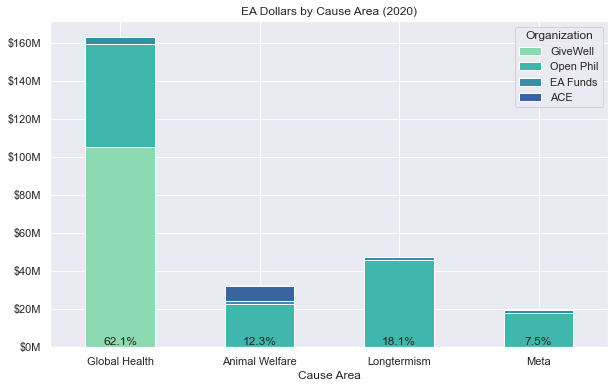

In [186]:
sns.set_palette('mako_r')
import matplotlib.pyplot as plt
#custom FuncFormatter
def millions(value, tick_number):
    return '$%1.0fM' % (value*1e-6)

fig, ax = plt.subplots()
df.plot(kind='bar', stacked=True, figsize=(10,6), title='EA Dollars by Cause Area (2020)', rot=0, ax=ax);
ax.yaxis.set_major_formatter(plt.FuncFormatter(millions))

#label bars
rects = ax.patches
labels = [f'{x*100:.1f}%' for x in proportions]
for rect, label in zip(rects, labels):
    # height = rect.get_height()
    height = 0 #above doesn't work as well for stacked rectangles
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

In [154]:
#Open Phil rolling window allocation
grants = pd.read_csv('open_phil_grants_db_raw.csv', usecols=['Organization Name', 'Focus Area', 'Amount', 'Date'], index_col='Date', parse_dates=True).dropna()
#Map their terminology to standard EA cause areas
cause_map = {'Global Health & Development':'Global Health', 'Farm Animal Welfare':'Animal Welfare', 'Global Catastrophic Risks':'Longtermism', 
                'Potential Risks from Advanced Artificial Intelligence': 'Longtermism', 'Biosecurity and Pandemic Preparedness':'Longtermism', 'Other areas':'Meta'}
cause_area = list() #store true labels
for index, row in grants.iterrows():
    if row['Focus Area'] in cause_map:
        cause_area.append(cause_map[row['Focus Area']])
    else:
        cause_area.append('X') #not an EA cause area
    if row['Organization Name'] == 'GiveWell':
        cause_area[-1] = 'Meta' #supporting GW belongs in Meta, not Global Health

grants['Cause Area'] = cause_area
grants

,Organization Name,Focus Area,Amount,Cause Area
Date,,,,
2021-02-01,Crustacean Compassion,Farm Animal Welfare,786830.0,Animal Welfare
2021-01-01,Center for Security and Emerging Technology,Potential Risks from Advanced Artificial Intel...,8000000.0,Longtermism
2021-01-01,UC Berkeley,Potential Risks from Advanced Artificial Intel...,11355246.0,Longtermism
2021-01-01,Berryville Institute of Machine Learning,Potential Risks from Advanced Artificial Intel...,150000.0,Longtermism
2020-12-01,University of Glasgow,Farm Animal Welfare,109552.0,Animal Welfare
...,...,...,...,...
2012-12-01,GiveDirectly,Global Health & Development,500000.0,Global Health
2012-12-01,Schistosomiasis Control Initiative,Global Health & Development,250000.0,Global Health
2012-12-01,Against Malaria Foundation,Global Health & Development,1250000.0,Global Health


In [155]:
grants['Cause Area'].value_counts()

X                 525
Animal Welfare    222
Longtermism       141
Global Health     132
Meta               51
Name: Cause Area, dtype: int64

In [156]:
grants = grants[grants['Cause Area'] != 'X'].drop('Focus Area', axis=1)
grants

,Organization Name,Amount,Cause Area
Date,,,
2021-02-01,Crustacean Compassion,786830.0,Animal Welfare
2021-01-01,Center for Security and Emerging Technology,8000000.0,Longtermism
2021-01-01,UC Berkeley,11355246.0,Longtermism
2021-01-01,Berryville Institute of Machine Learning,150000.0,Longtermism
2020-12-01,University of Glasgow,109552.0,Animal Welfare
...,...,...,...
2012-12-01,GiveDirectly,500000.0,Global Health
2012-12-01,Schistosomiasis Control Initiative,250000.0,Global Health
2012-12-01,Against Malaria Foundation,1250000.0,Global Health


In [162]:
#verify this is now correct
g_2020 = grants[grants.index.year == 2020]
split_2020 = g_2020.groupby('Cause Area').Amount.sum()

def millions(x):
    return '${:.1f}M'.format(x/1000000)
split_2020.apply(millions)

Cause Area
Animal Welfare    $22.6M
Global Health     $54.3M
Longtermism       $45.9M
Meta              $17.8M
Name: Amount, dtype: object

In [197]:
month_idx = pd.date_range('2015-01-01', '2021-02-01', freq='M')
running_totals = pd.DataFrame(index=month_idx)
by_cause = grants.groupby('Cause Area')
for cause, subframe in by_cause:
    running_totals[cause] = [subframe[d > subframe.index].Amount.sum() for d in running_totals.index]
running_totals

,Animal Welfare,Global Health,Longtermism,Meta
2015-01-31,0.0,26184382.0,0.0,3400000.0
2015-02-28,0.0,26184382.0,0.0,3410000.0
2015-03-31,0.0,26455174.0,0.0,3510000.0
2015-04-30,0.0,26455174.0,300000.0,3510000.0
2015-05-31,0.0,26455174.0,300000.0,3510000.0
...,...,...,...,...
2020-09-30,129904786.0,404354078.0,254499688.0,60987875.0
2020-10-31,129989386.0,404629078.0,255531152.0,63377628.0
2020-11-30,131918347.0,404629078.0,257186496.0,63377628.0
2020-12-31,132027899.0,411280078.0,257186496.0,63377628.0


In [206]:
trailing_dollars = running_totals - running_totals.shift(12)
trailing_dollars.dropna(inplace=True)
# trailing_dollars['Total'] = trailing_dollars.sum(axis=1)
trailing_dollars

,Animal Welfare,Global Health,Longtermism,Meta
2016-01-31,0.0,70856310.0,1986000.0,210000.0
2016-02-29,2500000.0,73856310.0,1986000.0,200000.0
2016-03-31,2500000.0,74697869.0,2086000.0,600000.0
2016-04-30,3550000.0,74697869.0,1786000.0,600000.0
2016-05-31,3550000.0,81447869.0,2382234.0,904000.0
...,...,...,...,...
2020-09-30,28456756.0,55612883.0,46582876.0,15772417.0
2020-10-31,25915454.0,55787883.0,47514340.0,18162170.0
2020-11-30,27514415.0,55787883.0,47264684.0,18162170.0
2020-12-31,22623967.0,54324458.0,45903684.0,17812170.0


In [235]:
trailing_proportion = trailing_dollars.apply(lambda x: x/x.sum(), axis=1)
trailing_proportion = trailing_proportion[cause_areas.values][trailing_proportion.index.year > 2016] #trim and re-order cols
trailing_proportion.head()

,Global Health,Animal Welfare,Longtermism,Meta
2017-01-31,0.542654,0.143630,0.283431,0.030286
2017-02-28,0.552795,0.137968,0.279798,0.029439
2017-03-31,0.386121,0.112655,0.460896,0.040328
2017-04-30,0.400377,0.114522,0.446145,0.038957
2017-05-31,0.371150,0.125948,0.464009,0.038892


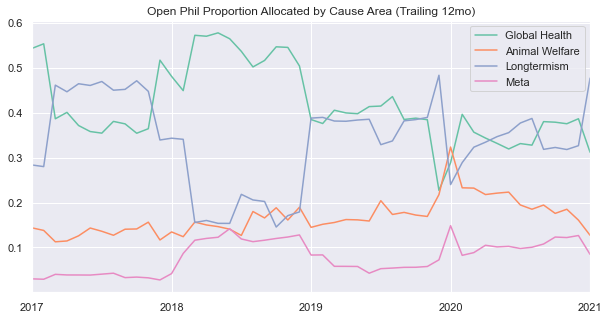

In [236]:
sns.set_palette('Set2')
trailing_proportion.plot(title='Open Phil Proportion Allocated by Cause Area (Trailing 12mo)', figsize=(10,5));